## importing neccessary liberaries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import logging

### Load Data

In [3]:
df = pd.read_csv("database SFRC.csv")

### EDA- Exploratory data analysis

In [4]:
df.isnull().sum()

d(mm)      0
B(mm)      0
fc(Mpa)    0
Rr         0
av/d       0
F          0
fy(Mpa)    0
vf%        0
Vu (KN)    0
dtype: int64

In [5]:
df.head()

,d(mm),B(mm),fc(Mpa),Rr,av/d,F,fy(Mpa),vf%,Vu (KN)
0,251.0,150.0,28.1,0.0267,3.0876,0.4875,565.0,0.75,112.9500
1,251.0,150.0,25.3,0.0267,3.0876,0.4875,565.0,0.75,79.0650
2,251.0,150.0,27.9,0.0267,3.0876,0.6500,565.0,1.00,109.1850
3,251.0,150.0,26.2,0.0267,3.0876,0.6500,565.0,1.00,123.4920
4,251.0,150.0,28.1,0.0267,3.0876,0.9750,565.0,1.50,111.0675


In [6]:
df.describe()

,d(mm),B(mm),fc(Mpa),Rr,av/d,F,fy(Mpa),vf%,Vu (KN)
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000
mean,264.202971,148.022746,48.991496,0.024563,2.604004,0.539549,470.245824,0.889170,148.364144
std,160.532443,64.874376,25.176735,0.010077,0.947298,0.359614,97.156011,0.549692,149.927020
min,85.250000,50.000000,9.770000,0.003700,0.202900,0.075000,275.862069,0.200000,12.824460
25%,159.000000,100.750000,33.220000,0.017800,2.000000,0.303000,420.000000,0.500000,47.534200
50%,222.000000,150.000000,40.750000,0.023900,2.713200,0.498750,462.000000,0.800000,108.816905
75%,300.000000,200.000000,55.075000,0.030900,3.184700,0.666094,530.000000,1.000000,190.221479
max,1118.000000,610.000000,215.000000,0.057200,5.953500,2.857500,900.000000,4.500000,1430.000000


In [7]:
# independent and target variables
X = df.drop('Vu (KN)', axis = 1)
y = df['Vu (KN)']

In [8]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform (X)
X_norm

array([[-0.08232928,  0.03050947, -0.83064519, ..., -0.14488495,
         0.97627937, -0.25343822],
       [-0.08232928,  0.03050947, -0.9419731 , ..., -0.14488495,
         0.97627937, -0.25343822],
       [-0.08232928,  0.03050947, -0.83859718, ...,  0.30745235,
         0.97627937,  0.20182885],
       ...,
       [ 0.01120566, -0.43239725, -0.67955731, ..., -1.29312579,
        -0.51769709, -1.25502576],
       [ 0.01120566, -0.43239725, -0.67955731, ..., -1.08435473,
        -0.51769709, -0.89081211],
       [ 0.01120566, -0.43239725, -0.67955731, ..., -0.87558367,
        -0.51769709, -0.52659846]])

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 64)

In [10]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [11]:
ADB1 = AdaBoostRegressor(random_state=0)
ADB1.fit(X_train, y_train)

AdaBoostRegressor(random_state=0)

In [12]:
ADB1.get_params()

{'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 0}

In [13]:
ADB1.feature_importances_

array([0.48924734, 0.28897042, 0.06077892, 0.06480563, 0.06601508,
       0.01679785, 0.00469116, 0.00869359])

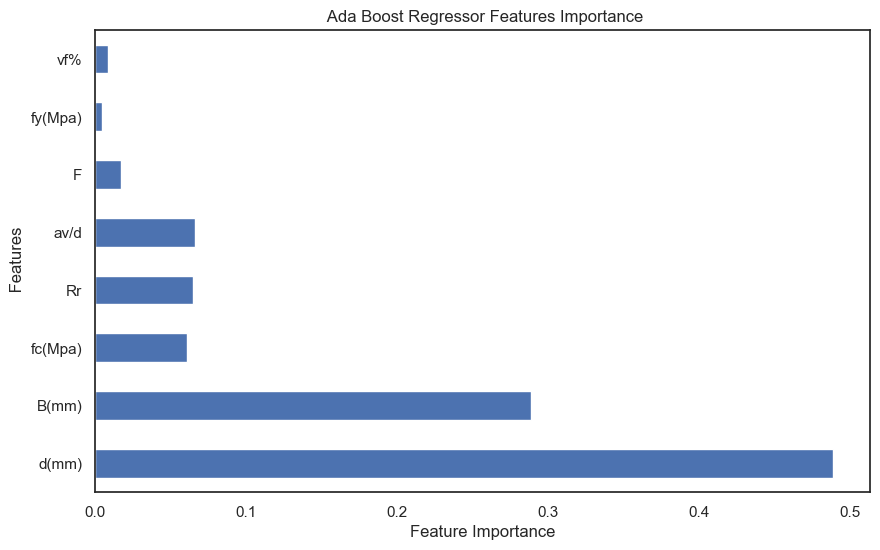

In [14]:
importances = pd.Series(ADB1.feature_importances_ , index=X.columns)
sns.set_style('white')
importances.plot(kind = 'barh', figsize=(10,6))
plt.xlabel("Feature Importance")
plt.ylabel(" Features")
plt.title(" Ada Boost Regressor Features Importance")
plt.show()

In [15]:
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,ADB1.predict(X_test))))
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,ADB1.predict(X_train))))
print('The MSE  on the testing dataset is: ',(mean_squared_error(y_test,ADB1.predict(X_test))))
print('The MSE  on the training dataset is: ',(mean_squared_error(y_train,ADB1.predict(X_train))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,ADB1.predict(X_test)))
print('The MAE  on the training daset is: ',mean_absolute_error(y_train,ADB1.predict(X_train)))
print('The r2_score on the testing dataset is: ',r2_score(y_test,ADB1.predict(X_test)))
print('The r2_score on the training dataset is: ',r2_score(y_train,ADB1.predict(X_train)))

The RMSE  on the testing dataset is:  62.087662068264926
The RMSE  on the training dataset is:  54.82389227321293
The MSE  on the testing dataset is:  3854.877781103063
The MSE  on the training dataset is:  3005.659163984856
The MAE  on the testing dataset is:  54.707392494404154
The MAE  on the training daset is:  48.07926384485508
The r2_score on the testing dataset is:  0.8429466791359763
The r2_score on the training dataset is:  0.8627539017105781


### Hyperparameter Tunning (Optimization)]

In [16]:
ADB_TEST = ADB1.predict(X_test)

In [21]:
ADB_TRAIN = ADB1.predict(X_train)

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Define a stronger base estimator
base_model = DecisionTreeRegressor(max_depth=4)  

# Initialize AdaBoost with the new base model
optimized_ada = AdaBoostRegressor(estimator=base_model, 
                                  n_estimators=best_params['n_estimators'], 
                                  learning_rate=best_params['learning_rate'], 
                                  loss=best_params['loss'], 
                                  random_state=42)

optimized_ada.fit(X_train, y_train)


AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  learning_rate=0.05, loss='exponential', n_estimators=500,
                  random_state=42)

In [38]:
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,optimized_ada.predict(X_test))))
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,optimized_ada.predict(X_train))))
print('The MSE  on the testing dataset is: ',(mean_squared_error(y_test,optimized_ada.predict(X_test))))
print('The MSE  on the training dataset is: ',(mean_squared_error(y_train,optimized_ada.predict(X_train))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,optimized_ada.predict(X_test)))
print('The MAE  on the training daset is: ',mean_absolute_error(y_train,optimized_ada.predict(X_train)))
print('The r2_score on the testing dataset is: ',r2_score(y_test,optimized_ada.predict(X_test)))
print('The r2_score on the training dataset is: ',r2_score(y_train,optimized_ada.predict(X_train)))

The RMSE  on the testing dataset is:  43.099378342807796
The RMSE  on the training dataset is:  33.80636649442249
The MSE  on the testing dataset is:  1857.5564135364898
The MSE  on the training dataset is:  1142.8704155552118
The MAE  on the testing dataset is:  34.3494780544
The MAE  on the training daset is:  27.738494681195263
The r2_score on the testing dataset is:  0.9243204532013225
The r2_score on the training dataset is:  0.9478136086536812


### Actual vs Predicted Capacity

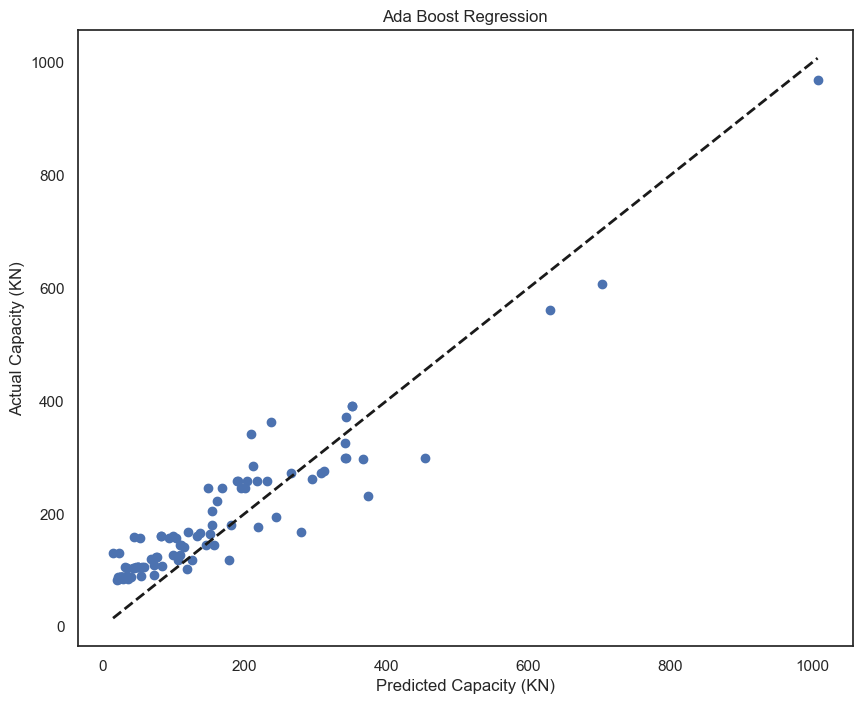

In [17]:
plt.figure(figsize=(10,8))
sns.set_style('white')
plt.title('Ada Boost Regression')
plt.xlabel("Predicted Capacity (KN)")
plt.ylabel("Actual Capacity (KN)")
plt.scatter(y_test,ADB_TEST)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

### Pickling The Model For Deployment

In [16]:
import pickle
with open('ADB1_pkl', 'wb')as f:
    pickle.dump(ADB1,f)

In [17]:
pickled_model = pickle.load(open('ADB1_pkl', 'rb'))

In [20]:
pickled_model.predict(scaler.transform(X_test.iloc[0].values.reshape(1, -1)))

array([120.28169652])

In [21]:
Xn = np.array([[221, 152, 34, 0.012, 2.45, 0.3, 448, 0.5]])
pickled_model.predict(scaler.transform(Xn.reshape(1,-1)))

array([108.85879885])